Apply a full data science process on medical assurance data including full data analysis and ML to predict medical assurance charges

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(rc = {'figure.figsize':[10, 10]}, font_scale = 1.2)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/session 23 data/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

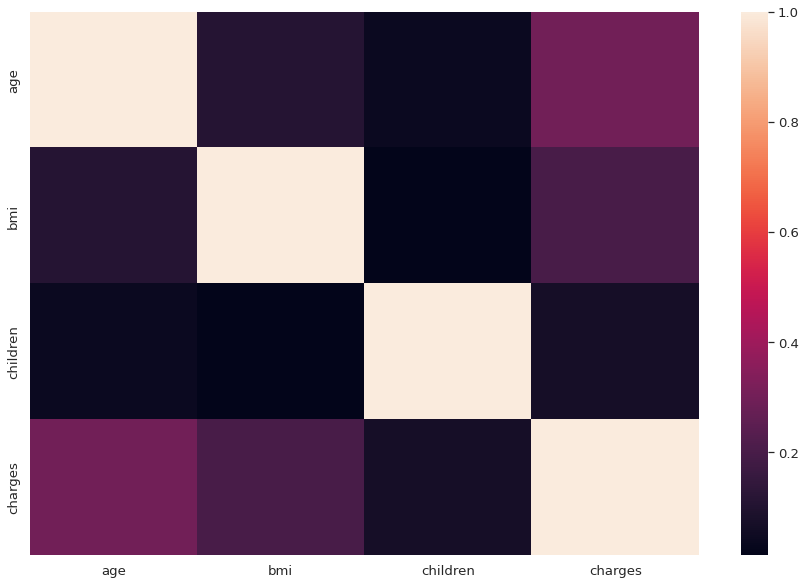

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())

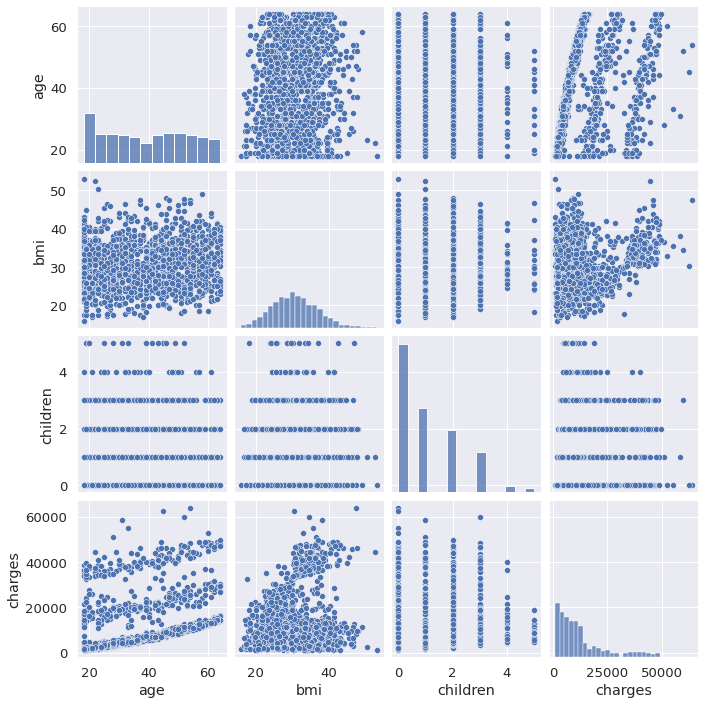

In [ ]:
sns.pairplot(df)

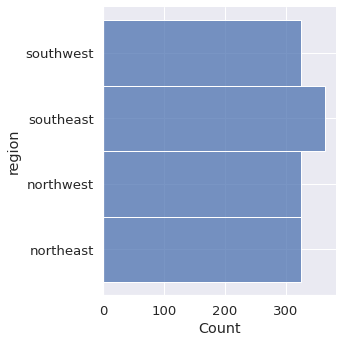

In [ ]:
sns.displot(y = 'region', data = df)

In [ ]:
import plotly.express as px

In [ ]:
fig = px.histogram(df, x="region", color="sex", marginal='rug',hover_data=df.columns)
fig.show()

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.corr()['charges']

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

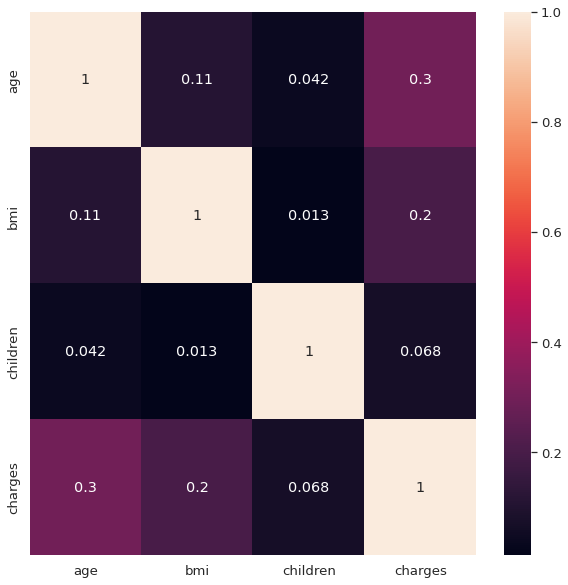

In [ ]:
sns.heatmap(df.corr(), annot= True)

In [ ]:
df.groupby('region').describe()['charges']

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


In [ ]:
df.groupby('sex').describe()['charges']

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


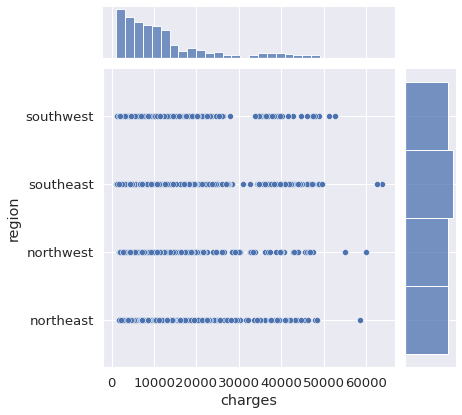

In [ ]:
sns.jointplot(x= 'charges', y = 'region', data = df)

In [ ]:
df[  df.duplicated()  ]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
# !pip install datasist

In [ ]:
# from datasist.structdata import detect_outliers

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
## Not needed since we got 0 outliers
# idx = detect_outliers(df, 0,['charges'])
# df = df.drop(idx, axis = 0, inplace=True)
# df

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
new_df = pd.get_dummies(data = df,columns = ['sex','smoker','region'], drop_first=True)

In [ ]:
new_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
## shuffle
from sklearn.utils import shuffle
clean = shuffle(new_df)

## reset indexes
clean.reset_index(inplace=True, drop=True)
clean.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,46,48.07,2,9432.9253,0,0,0,0,0
1,49,31.35,1,9290.1395,1,0,0,0,0
2,54,32.68,0,10923.9332,0,0,0,0,0
3,34,27.72,0,4415.1588,0,0,0,1,0
4,18,39.16,0,1633.0444,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X = clean.drop('charges', axis = 1)
y = clean['charges']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

In [ ]:
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from sklearn.svm import SVR, SVC
# from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
# from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from xgboost import XGBRegressor, XGBClassifier
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, recall_score, precision_score, fbeta_score


# models = {
#     # 'logreg': LogisticRegression(), # classification
#     # 'SVC': SVC(), # classification
#     # 'KNNc':KNeighborsClassifier(), # classification
#     # 'DTc': DecisionTreeClassifier(), # classification
#     # 'RFc': RandomForestClassifier(), # classification
#     # 'XGBc':XGBClassifier(), # classification

#     'LR': LinearRegression(),
#     'SVM': SVR(),
#     'KNN': KNeighborsRegressor(),
#     'DT': DecisionTreeRegressor(),
#     'RF': RandomForestRegressor(),
#     'XGB': XGBRegressor()
# }


# for name, model in models.items():
#     print(f"Model: {name}")
#     print("-"*20)
#     model.fit(X_train, y_train)
#     y_pred_train = model.predict(X_train)
#     y_pred_test = model.predict(X_test)
#     print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train)}")
#     print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test)}")
#     print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
#     print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
#     print(f"Train R2: {r2_score(y_train, y_pred_train)}")
#     print(f"Test R2: {r2_score(y_test, y_pred_test)}")
    

#     print("\n")

We made a loop to iterate through models and Random forest regressor was the best of them so we will take this model and apply it onto a custom data

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, recall_score, precision_score, fbeta_score

In [ ]:
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train)}")
print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test)}")
print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
print(f"Train R2: {r2_score(y_train, y_pred_train)}")
print(f"Test R2: {r2_score(y_test, y_pred_test)}")

Train MAE: 1020.389738256796
Test MAE: 2679.638432745654
Train RMSE: 1849.002810007878
Test RMSE: 4946.920393195862
Train R2: 0.9764526105395833
Test R2: 0.8383066905380305


In [ ]:
clean.charges.describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [ ]:
X.iloc[500]

age                 64.00
bmi                 23.76
children             0.00
sex_male             1.00
smoker_yes           1.00
region_northwest     0.00
region_southeast     1.00
region_southwest     0.00
Name: 500, dtype: float64

In [ ]:
X.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
import joblib
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [ ]:
## here we will enter a custom dataset and will apply model to it
new_m = [50, 30, 3, 1, 1, 1, 0, 0]

In [ ]:
new_m = scaler.transform([new_m])
new_m

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[ 0.79567481, -0.10339605,  1.5763225 ,  0.99906498,  1.99301104,
         1.76395535, -0.60725448, -0.57554998]])

In [ ]:
model.predict(new_m)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



array([36433.9111842])